# Data Gathering

## Scraping

### Beautiful Soup

Beautiful Soup is a Python library designed for parsing HTML and XML documents, including those with malformed markup. It constructs a parse tree from the document, enabling navigation, searching, and modification of the content. This functionality is particularly useful for web scraping, where data needs to be extracted from web pages.

You can install Requests with `pip install requests` and Beautiful Soup with `pip install beautifulsoup4`.

Here, we import the main Python libraries needed for web scraping and data handling:
- `requests` for fetching data from web pages,
- `bs4` for parsing HTML content, and
- `pandas` for organizing data into tables.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Now, we send a request to the target website https://klimi.mk/ using the `requests` library.

In [2]:
response = requests.get("https://klimi.mk/")

We inspect the server's response to confirm a successful connection and preview a small part of the HTML content.

In [3]:
response

<Response [200]>

In [4]:
print(response.text[:512])

<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
                <meta property="fb:app_id" content="308558492587260" />
        <meta property="og:url" content="https://klimi.mk" />
        <meta property="og:image" content="https://klimi.mk/public/storage/main/fb.png" />
        <meta property="og:title" content="КЛИМИ.мк - резиденцијални и комерцијални клима уреди" />
        <meta property="og:type" content="artic


We use `BeautifulSoup` to parse the HTML text into a structured format. This allows easy navigation and searching within the page’s elements.

In [5]:
soup = BeautifulSoup(response.text, "html.parser")

In [6]:
print(soup.prettify()[:512])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="308558492587260" property="fb:app_id">
   <meta content="https://klimi.mk" property="og:url">
    <meta content="https://klimi.mk/public/storage/main/fb.png" property="og:image"/>
    <meta content="КЛИМИ.мк - резиденцијални и комерцијални клима уреди" property="og:title"/>
    <meta content="article" property="og:type"/>
    <meta content="KLIMI.MK | De


#### Selectors

- Class Selector: Use a dot `.` followed by the class name to select elements by class.

  *Example:* `.sale` selects all elements with the class `sale`.

- ID Selector: Use a hash `#` followed by the ID name to select elements by ID.

  *Example:* `#product` selects the element with the ID `product`.

- Tag Selector: Use the tag name to select elements by their HTML tag.

  *Examples:* `p` -> paragraph, `a` -> anchor (link), `div` -> division, etc.

Here, we extract specific parts of the HTML using CSS selectors. Specifically, we select all manufacturer elements by their class. Then, we inspect these elements to verify that the selections are correct.

In [7]:
manufacturer_elements = soup.select(".proizvoditel")

In [8]:
manufacturer_elements

[<input class="custom-control-input proizvoditel" id="gree" name="" type="checkbox" value="6"/>,
 <input class="custom-control-input proizvoditel" id="vivax" name="" type="checkbox" value="8"/>,
 <input class="custom-control-input proizvoditel" id="hisense" name="" type="checkbox" value="52"/>,
 <input class="custom-control-input proizvoditel" id="toshiba" name="" type="checkbox" value="45"/>,
 <input class="custom-control-input proizvoditel" id="tesla" name="" type="checkbox" value="39"/>,
 <input class="custom-control-input proizvoditel" id="carrier" name="" type="checkbox" value="49"/>,
 <input class="custom-control-input proizvoditel" id="haier" name="" type="checkbox" value="44"/>,
 <input class="custom-control-input proizvoditel" id="fujitsu" name="" type="checkbox" value="57"/>,
 <input class="custom-control-input proizvoditel" id="samsung" name="" type="checkbox" value="43"/>,
 <input class="custom-control-input proizvoditel" id="daikin" name="" type="checkbox" value="42"/>,
 <

We extract the `id` attribute from each manufacturer element.

In [9]:
manufacturers = [
    manufacturer_element.get("id") for manufacturer_element in manufacturer_elements
]

In [10]:
manufacturers

['gree',
 'vivax',
 'hisense',
 'toshiba',
 'tesla',
 'carrier',
 'haier',
 'fujitsu',
 'samsung',
 'daikin',
 'mitsubishi',
 'aux',
 'tosot',
 'hitachi',
 'hyundai',
 'tcl',
 'bosch',
 'vaillant']

We select the slider element using its `id`. Then, we locate all image tags inside the slider and extract their `src` attributes. These URLs can be used to download or display product images later.

In [11]:
slider_element = soup.select_one("#slider")

In [12]:
print(str(slider_element)[:512])

<section id="slider"><!--slider-->
<div class="carousel slide div-slajder" data-ride="carousel" id="carousel-example-generic">
<!-- Indicators -->
<ol class="carousel-indicators">
<li class="active" data-slide-to="0" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="1" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="2" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="3" data-target="#carousel-example-generic"></li>
<li class="" data-


In [13]:
image_elements = slider_element.select("img.img.img-fluid.slika-klima-slajder")

In [14]:
len(image_elements)

20

In [15]:
print(image_elements[0])

<img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png"/>


In [16]:
image_elements[0].get("src")

'https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png'

In [17]:
image_urls = [image_element.get("src") for image_element in image_elements]

In [18]:
len(image_urls)

20

In [19]:
image_urls[:10]

['https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png',
 'https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png',
 'https://klimi.mk/public/storage/proizvodi/hiv5ww2PyxFlN0cyQTKvVaiQX0gKL8WkGfCNTq09.png',
 'https://klimi.mk/public/storage/proizvodi/VTsibO8WletY6YemkQ6hw8550ObFFV2ORKhEqPJb.png',
 'https://klimi.mk/public/storage/proizvodi/PDrEGeZDdN3ujtFob1VXKit59Ovh0sbIs71xwz96.png',
 'https://klimi.mk/public/storage/proizvodi/jlIYzJL8xK9IEfcBcCUfVppZYahF4xh7xGfwbYgG.png',
 'https://klimi.mk/public/storage/proizvodi/eYeTB1U65b9ufDp9UMXZQDAeqUMrDcbnlLaVG7Q0.png',
 'https://klimi.mk/public/storage/proizvodi/8cJsyyDKa6NYhI8WZ928Y3Qh4FAbkou4NGHdokMt.jpeg',
 'https://klimi.mk/public/storage/proizvodi/hEt0buOJSJAgqv4QVGCFPpc72SKqUlJ2VpHfepAc.png',
 'https://klimi.mk/public/storage/proizvodi/r1eCBrb70xosGF5aR6xOi5SdtRHKX56VFJ88VT4B.png']

The main product data is grouped in a specific container on the web page. We locate and inspect this container to understand how product information is organized.

In [20]:
container = soup.select_one(".sodrzina-klimi-naslovna")

In [21]:
print(str(container)[:512])

<div class="sodrzina-klimi-naslovna">
<!-- -->
<div class="col-md-12 row klimi-red" id="proizvodi-data">
<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"


In [22]:
rows = container.select(".klimi-red")

In [23]:
len(rows)

2

In [24]:
print(str(rows[0])[:512])

<div class="col-md-12 row klimi-red" id="proizvodi-data">
<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"/>
<span class="opis-model">ACP-12CH35AEFIs R32


In [25]:
cells = []
for row in rows:
    cells.extend(row.select(".klima-box"))

In [26]:
len(cells)

9

In [27]:
print(cells[0])

<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"/>
<span class="opis-model">ACP-12CH35AEFIs R32</span>
</div>
<div class="osnovni-podatoci-div">
<span class="osnovni-info"><b>ТИП</b>: ИНВЕРТЕР СПЛИТ СИСТЕМ</span>
<span class="osnovni-info"><b>ЕНЕРГЕТСКА КЛАСА</b>: A++ </span>
<span class="osnovni-info"><b>МОЌНОСТ</b>: 3517/3810 W</span>
<span class="osnovni-info"><b>ГРЕЕЊЕ / ЛАДЕЊЕ</b>: ОД -10℃ ДО 50℃</span>
<span class="osnovni-info"><b>ПРЕПОРАЧАНА ПОВРШИНА</b>: <span style="color: #090037;">ДО 30 м<sup>2</sup></span></span>
<span class="osnovni-info info-funkcii" title="Внесете свежина во вашите домашни и деловни простории и во нај

We extract the brand name and model for each product. Also, we define a helper function to simplify this process for multiple items.

In [28]:
manufacturer_details = cells[0].select_one(".proizvoditel-model")

In [29]:
manufacturer_details.select_one("img").get("alt")

'VIVAX'

In [30]:
manufacturer_details.select_one(".opis-model").text

'ACP-12CH35AEFIs R32'

In [31]:
def extract_brand_and_model(cell):
    manufacturer_details = cell.select_one(".proizvoditel-model")
    brand = manufacturer_details.select_one("img").get("alt")
    model = manufacturer_details.select_one(".opis-model").text
    return {"brand": brand, "model": model}

In [32]:
extract_brand_and_model(cells[0])

{'brand': 'VIVAX', 'model': 'ACP-12CH35AEFIs R32'}

Each product has key details such as energy class, power, area coverage, etc. We extract these properties and store them in a structured dictionary for easier analysis. Again, we define a helper function that extracts these properties for a cell.

In [33]:
properties = cells[0].select(".osnovni-info")

In [34]:
names = [
    "type",
    "energy_class",
    "power",
    "temperature",
    "area",
    "functions",
    "guarantee",
]

In [35]:
info = {}
for index in range(len(names)):
    name = names[index]
    parts = properties[index].text.split(":")
    info[name] = parts[1].strip()

In [36]:
info

{'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
 'energy_class': 'A++',
 'power': '3517/3810 W',
 'temperature': 'ОД -10℃ ДО 50℃',
 'area': 'ДО 30 м2',
 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
 'guarantee': '5 ГОДИНИ'}

In [37]:
def extract_properties(cell):
    properties = cell.select(".osnovni-info")

    info = {}
    for index in range(len(names)):
        name = names[index]
        parts = properties[index].text.split(":")
        info[name] = parts[1].strip()

    return info

In [38]:
extract_properties(cells[0])

{'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
 'energy_class': 'A++',
 'power': '3517/3810 W',
 'temperature': 'ОД -10℃ ДО 50℃',
 'area': 'ДО 30 м2',
 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
 'guarantee': '5 ГОДИНИ'}

Here, we extract the current and previous product price. Note that not each product has a discount, so not each product has a previous price. Then, we define a helper function to extract the prices for a cell as we did before.

In [39]:
curr_price_element = cells[0].select_one(".cena-box-naslovna")

In [40]:
curr_price_element

<span class="cena-box-naslovna" style="color: #ffffff !important;">17.990<sup>00</sup></span>

In [41]:
curr_price = curr_price_element.contents[0]

In [42]:
curr_price

'17.990'

In [43]:
prev_price_element = cells[0].select_one(".stara-cena-linija")

In [44]:
prev_price_element

<span class="stara-cena-linija" style="color: #ffffff; font-size: 1.4em; position: relative; bottom: -24px;">20.990<sup>00</sup></span>

In [45]:
prev_price = prev_price_element.contents[0] if prev_price_element else None

In [46]:
prev_price

'20.990'

In [47]:
def extract_prices(cell):
    curr_price_element = cell.select_one(".cena-box-naslovna")
    curr_price = curr_price_element.contents[0]
    prev_price_element = cell.select_one(".stara-cena-linija")
    prev_price = prev_price_element.contents[0] if prev_price_element else None
    return {"curr_price": curr_price, "prev_price": prev_price}

In [48]:
extract_prices(cells[0])

{'curr_price': '17.990', 'prev_price': '20.990'}

Here, we combine all the previously defined helper functions to extract all relevant data for each product cell. We then transform this data into a list of dictionaries, where each dictionary represents a product with its details.

In [49]:
def extract_cell_data(cell):
    dictionary = {}

    manufacturer_details = extract_brand_and_model(cell)
    dictionary.update(manufacturer_details)

    info = extract_properties(cell)
    dictionary.update(info)

    price = extract_prices(cell)
    dictionary.update(price)

    return dictionary

In [50]:
data = []
for cell in cells:
    data.append(extract_cell_data(cell))

In [51]:
data[:3]

[{'brand': 'VIVAX',
  'model': 'ACP-12CH35AEFIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3517/3810 W',
  'temperature': 'ОД -10℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '17.990',
  'prev_price': '20.990'},
 {'brand': 'TESLA',
  'model': 'CLASSIC TA36FFLL-1232IA',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3400/3500 W',
  'temperature': 'ОД -15℃ ДО 49℃',
  'area': 'ДО 35 м2',
  'functions': '/',
  'guarantee': '3 ГОДИНИ',
  'curr_price': '18.990',
  'prev_price': None},
 {'brand': 'VIVAX',
  'model': 'ACP-12CH35AEXIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3520/3810 W',
  'temperature': 'ОД -15℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': '/',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '19.990',
  'prev_price': '24.990'}]

Now, we store the extracted data in a `pandas` data frame.

In [52]:
df = pd.DataFrame(data)

In [53]:
df

,brand,model,type,energy_class,power,temperature,area,functions,guarantee,curr_price,prev_price
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3500 W,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,None
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3520/3810 W,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,2640 W,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,None
5,TOSOT,MUSE PREMIUM TWH12AFBXB-K6DNA5A,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3200/3400 W,ОД -15℃ ДО 43℃,ДО 30 м2,"Произведено од GREE. Самодијагноза, интелегент...",3 ГОДИНИ,19.990,31.990
6,VIVAX,ACP-09CH25AEMIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, самодијагноза, 1W standby, ...",5 ГОДИНИ,19.990,24.990
7,VIVAX,ACP-12CH35AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -15℃ ДО 50℃,ДО 35 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,20.990,25.990
8,TESLA,CLASSIC TT34EX21-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3420 W,ОД -20℃ ДО 53℃,ДО 35 м2,/,3 ГОДИНИ,20.990,25.990


In [54]:
df["brand"].unique()

array(['VIVAX', 'TESLA', 'TOSOT'], dtype=object)

### Selenium

Selenium with Python provides a powerful combination for automating web browsers, enabling tasks such as web scraping, automated testing, and general web automation.

Selenium can handle dynamic pages that load content with JavaScript, which `requests` cannot easily access. We import the necessary Selenium components and prepare to interact with the browser.

In [55]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

In [56]:
driver = Chrome()

In [57]:
driver.get("https://klimi.mk/")

Here, we automate page scrolling using `selenium` in order to scroll to the end of the page and collect data for each product displayed of the page.

In [58]:
last_height = driver.execute_script("return document.body.scrollHeight;")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(3)

    new_height = driver.execute_script("return document.body.scrollHeight;")

    if new_height == last_height:
        break
    last_height = new_height

In [59]:
grid_element = driver.find_element(By.CLASS_NAME, "sodrzina-klimi-naslovna")

In [60]:
row_elements = grid_element.find_elements(By.CLASS_NAME, "klimi-red")

In [61]:
len(row_elements)

33

In [62]:
cell_elements = []
for row_element in row_elements:
    curr_cell_elements = row_element.find_elements(By.CLASS_NAME, "klima-box")
    cell_elements.extend(curr_cell_elements)

In [63]:
len(cell_elements)

286

In [64]:
curr_price_element = cell_elements[0].find_element(By.CLASS_NAME, "cena-box-naslovna")

In [65]:
curr_price = driver.execute_script(
    "return arguments[0].firstChild.nodeValue;",
    curr_price_element,
)

In [66]:
curr_price

'17.990'

In [67]:
prev_price_element = cell_elements[0].find_element(By.CLASS_NAME, "stara-cena-linija")

In [68]:
prev_price = driver.execute_script(
    "return arguments[0].firstChild.nodeValue;",
    prev_price_element,
)

In [69]:
prev_price

'20.990'

In [70]:
print(cell_elements[0].get_attribute("outerHTML"))

<div class="col-md-4 col-sm-6 klima-box   ramka-promo-cena  ">
                                        <div class="header-box">
                                            <img src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png" alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box">
                                        </div>
                    <div class="proizvoditel-model">
                        <img src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png" alt="VIVAX" align="left" class="logo-box-klima">
                        <span class="opis-model">ACP-12CH35AEFIs R32</span>
                    </div>
                    <div class="osnovni-podatoci-div">
                        <span class="osnovni-info"><b>ТИП</b>: ИНВЕРТЕР СПЛИТ СИСТЕМ</span>
                                                    <span class="osnovni-info"><b>ЕНЕРГЕТСКА КЛАСА</b>: A++ </span>
                                                <span 

In [71]:
data = []
for cell_element in cell_elements:
    outer_html = cell_element.get_attribute("outerHTML")
    soup = BeautifulSoup(outer_html, "html.parser")
    data.append(extract_cell_data(soup))

In [73]:
data[:3]

[{'brand': 'VIVAX',
  'model': 'ACP-12CH35AEFIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3517/3810 W',
  'temperature': 'ОД -10℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '17.990',
  'prev_price': '20.990'},
 {'brand': 'TESLA',
  'model': 'CLASSIC TA36FFLL-1232IA',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3400/3500 W',
  'temperature': 'ОД -15℃ ДО 49℃',
  'area': 'ДО 35 м2',
  'functions': '/',
  'guarantee': '3 ГОДИНИ',
  'curr_price': '18.990',
  'prev_price': None},
 {'brand': 'VIVAX',
  'model': 'ACP-12CH35AEXIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3520/3810 W',
  'temperature': 'ОД -15℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': '/',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '19.990',
  'prev_price': '24.990'}]

In [74]:
driver.quit()

In [75]:
df = pd.DataFrame(data)

In [76]:
df

,brand,model,type,energy_class,power,temperature,area,functions,guarantee,curr_price,prev_price
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3500 W,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,None
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3520/3810 W,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,2640 W,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,None
...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,15240/18170 W,ОД -20℃ ДО 50℃,ДО 170 м2,/,5 ГОДИНИ,199.990,None
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,16120/17000 W,ОД -15℃ ДО 50℃,ДО 170 м2,/,5 ГОДИНИ,199.990,None
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,9600/10000 W,ОД -15℃ ДО 46℃,ДО 100 м2,• Серијата ZR е идеално решение за греење и ла...,3 ГОДИНИ,205.590,None
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,14000/14600 W,ОД -15℃ ДО 46℃,ДО 140 м2,Екстремно тивок и штедлив клима уред\nА/ А ене...,3 ГОДИНИ,249.990,None


In [77]:
df.to_csv("data/02/raw_data.csv", index=False)

# Data Analysis

We import extra libraries for data analysis and visualization:
- `re` for regular expressions,
- `numpy` for numerical calculations, and
- `matplotlib.pyplot` and `seaborn` for creating charts and statistical plots.

In [78]:
import re

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We inspect each column in our data frame and preprocess its data if needed.

In [79]:
df = pd.read_csv("data/02/raw_data.csv", dtype=str)

In [80]:
df["brand"].unique()

array(['VIVAX', 'TESLA', 'TOSOT', 'GREE', 'TCL', 'AUX', 'HISENSE',
       'HAIER', 'BOSCH', 'CARRIER', 'SAMSUNG', 'VAILLANT', 'TOSHIBA',
       'HITACHI', 'FUJITSU', 'MITSUBISHI', 'DAIKIN', 'HYUNDAI'],
      dtype=object)

In [81]:
df["type"].unique()

array(['ИНВЕРТЕР СПЛИТ СИСТЕМ', 'МОБИЛНИ КЛИМА УРЕДИ',
       'СТАНДАРД СПЛИТ СИСТЕМ', 'ПАРАПЕТНИ/КОНЗОЛНИ',
       'КАСЕТНИ СПЛИТ СИСТЕМ', 'КАНАЛНИ СИСТЕМИ', 'САМОСТОЕЧКИ'],
      dtype=object)

In [82]:
df["energy_class"].unique()

array(['A++', 'A', 'A+++', 'A+'], dtype=object)

In [83]:
text = "2700/3000 W"

In [84]:
numbers = re.findall(r"\d+", text)

In [85]:
def preprocess_power(power):
    numbers = re.findall(r"\d+", power)
    if len(numbers) == 1:
        return numbers * 2
    return numbers

In [86]:
df[["min_power", "max_power"]] = df["power"].apply(preprocess_power).tolist()

In [87]:
df["min_power"] = df["min_power"].astype(int)

In [88]:
df["max_power"] = df["max_power"].astype(int)

In [89]:
df.drop(columns=["power"], inplace=True)

In [90]:
df

,brand,model,type,energy_class,temperature,area,functions,guarantee,curr_price,prev_price,min_power,max_power
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990,3517,3810
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,NaN,3400,3500
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990,3520,3810
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990,2638,2930
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,NaN,2640,2640
...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,ОД -20℃ ДО 50℃,ДО 170 м2,/,5 ГОДИНИ,199.990,NaN,15240,18170
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,ОД -15℃ ДО 50℃,ДО 170 м2,/,5 ГОДИНИ,199.990,NaN,16120,17000
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,ОД -15℃ ДО 46℃,ДО 100 м2,• Серијата ZR е идеално решение за греење и ла...,3 ГОДИНИ,205.590,NaN,9600,10000
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,ОД -15℃ ДО 46℃,ДО 140 м2,Екстремно тивок и штедлив клима уред\nА/ А ене...,3 ГОДИНИ,249.990,NaN,14000,14600


In [91]:
text = "ОД -10℃ ДО 50℃"

In [92]:
numbers = re.findall(r"-?\d+", text)

In [93]:
numbers

['-10', '50']

In [94]:
df[["min_temp", "max_temp"]] = (
    df["temperature"].apply(lambda text: re.findall(r"-?\d+", text)).tolist()
)

In [95]:
df["min_temp"] = df["min_temp"].astype(int)

In [96]:
df["max_temp"] = df["max_temp"].astype(int)

In [97]:
df.drop(columns=["temperature"], inplace=True)

In [98]:
df

,brand,model,type,energy_class,area,functions,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 35 м2,/,3 ГОДИНИ,18.990,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,NaN,2640,2640,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,ДО 170 м2,/,5 ГОДИНИ,199.990,NaN,15240,18170,-20,50
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,ДО 170 м2,/,5 ГОДИНИ,199.990,NaN,16120,17000,-15,50
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,ДО 100 м2,• Серијата ZR е идеално решение за греење и ла...,3 ГОДИНИ,205.590,NaN,9600,10000,-15,46
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,ДО 140 м2,Екстремно тивок и штедлив клима уред\nА/ А ене...,3 ГОДИНИ,249.990,NaN,14000,14600,-15,46


In [99]:
df["area"] = df["area"].apply(lambda text: re.findall(r"\d+", text)[0])

In [100]:
df["area"] = df["area"].astype(int)

In [101]:
df["guarantee"] = df["guarantee"].apply(lambda text: re.findall(r"\d+", text)[0])

In [102]:
df["guarantee"] = df["guarantee"].astype(int)

In [103]:
df

,brand,model,type,energy_class,area,functions,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,Внесете свежина во вашите домашни и деловни пр...,5,17.990,20.990,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,35,/,3,18.990,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,/,5,19.990,24.990,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,25,"Висока ефикасност, прикажување на самодијагноз...",5,19.990,22.990,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,25,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3,19.990,NaN,2640,2640,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,170,/,5,199.990,NaN,15240,18170,-20,50
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,170,/,5,199.990,NaN,16120,17000,-15,50
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,100,• Серијата ZR е идеално решение за греење и ла...,3,205.590,NaN,9600,10000,-15,46
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,140,Екстремно тивок и штедлив клима уред\nА/ А ене...,3,249.990,NaN,14000,14600,-15,46


In [104]:
df["curr_price"] = df["curr_price"].apply(lambda price: price.replace(".", ""))

In [105]:
df["curr_price"] = df["curr_price"].astype(float)

In [106]:
df["prev_price"] = df["prev_price"].apply(
    lambda price: price.replace(".", "") if not pd.isna(price) else np.nan
)

In [107]:
df["prev_price"] = df["prev_price"].astype(float)

In [108]:
df

,brand,model,type,energy_class,area,functions,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,Внесете свежина во вашите домашни и деловни пр...,5,17990.0,20990.0,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,35,/,3,18990.0,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,/,5,19990.0,24990.0,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,25,"Висока ефикасност, прикажување на самодијагноз...",5,19990.0,22990.0,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,25,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3,19990.0,NaN,2640,2640,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,170,/,5,199990.0,NaN,15240,18170,-20,50
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,170,/,5,199990.0,NaN,16120,17000,-15,50
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,100,• Серијата ZR е идеално решение за греење и ла...,3,205590.0,NaN,9600,10000,-15,46
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,140,Екстремно тивок и штедлив клима уред\nА/ А ене...,3,249990.0,NaN,14000,14600,-15,46


In [109]:
df.to_csv("data/02/clean_data.csv", index=False)

In [110]:
df.describe()

,area,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
count,286.000000,286.000000,286.000000,163.000000,286.000000,286.000000,286.000000,286.000000
mean,56.136364,4.346154,67932.692308,56940.797546,5199.604895,5699.279720,-18.503497,47.300699
std,32.186719,2.590625,45500.917740,24536.548979,2926.129317,3218.596652,5.644279,5.873562
min,20.000000,1.000000,17990.000000,20990.000000,2000.000000,1115.000000,-32.000000,0.000000
25%,35.000000,3.000000,36990.000000,39490.000000,3500.000000,3800.000000,-22.000000,46.000000
50%,55.000000,3.000000,56615.000000,52990.000000,4600.000000,5100.000000,-15.000000,50.000000
75%,63.750000,5.000000,83015.000000,70290.000000,5300.000000,6150.000000,-15.000000,50.000000
max,180.000000,10.000000,305990.000000,169990.000000,16120.000000,18170.000000,17.000000,54.000000


In [111]:
df["curr_price"].quantile([0.25, 0.50, 0.75])

0.25    36990.0
0.50    56615.0
0.75    83015.0
Name: curr_price, dtype: float64

# Data Visualization

## Histogram

We use a histogram to visualize how current prices are distributed across products. Histogram is a graphical distribution of data arranged into discrete groups (bins). Although similar in apperance to a bar graph, a histogram deals with continuous data.

<Axes: >

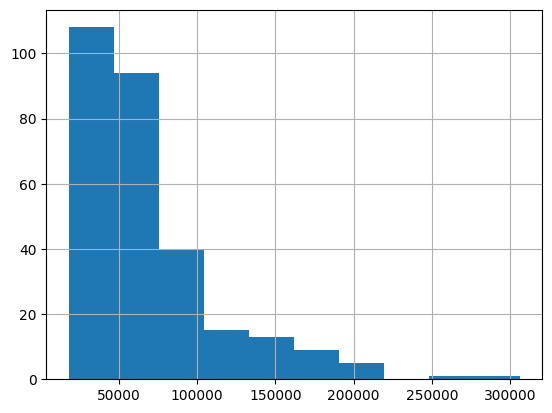

In [112]:
df["curr_price"].hist()

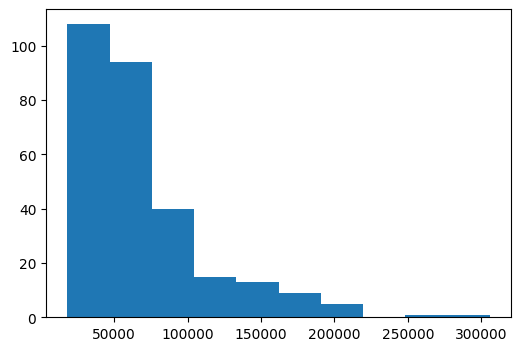

In [113]:
plt.figure(figsize=(6, 4))
plt.hist(df["curr_price"], bins=10)
plt.show()

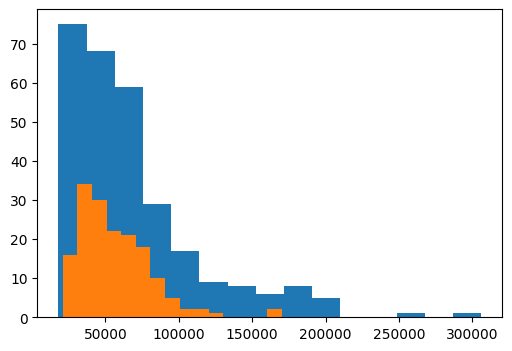

In [114]:
plt.figure(figsize=(6, 4))
plt.hist(df["curr_price"], bins=15)
plt.hist(df["prev_price"], bins=15)
plt.show()

The `kde` line shows the density estimate, helping to understand where most prices fall.

<Axes: xlabel='curr_price', ylabel='Count'>

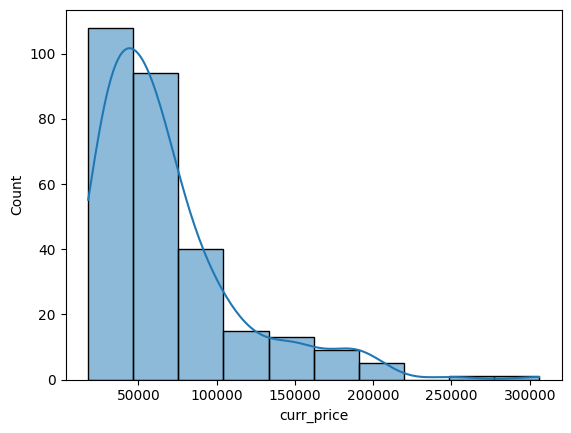

In [115]:
sns.histplot(df["curr_price"], kde=True, bins=10)

## Bar Plot

This bar plot shows how many products belong to each type. It provides a quick overview of which product categories dominate the dataset.

<Axes: xlabel='type'>

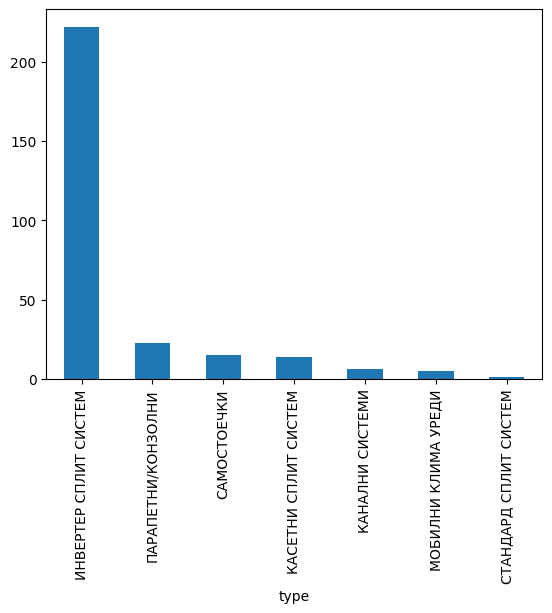

In [116]:
df["type"].value_counts().plot.bar()

In [117]:
counts_per_type = df["type"].value_counts()

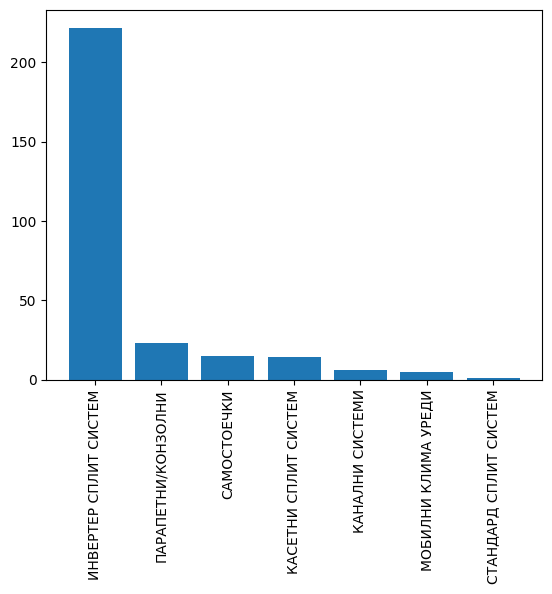

In [118]:
plt.bar(counts_per_type.index, counts_per_type)
plt.xticks(rotation=90)
plt.show()

## Box Plot

![A box plot.](images\boxplot.png)

We use box plots to identify how prices are spread and to detect potential outliers. Box plots summarize the median, quartiles, and extremes of the price range.

<Axes: >

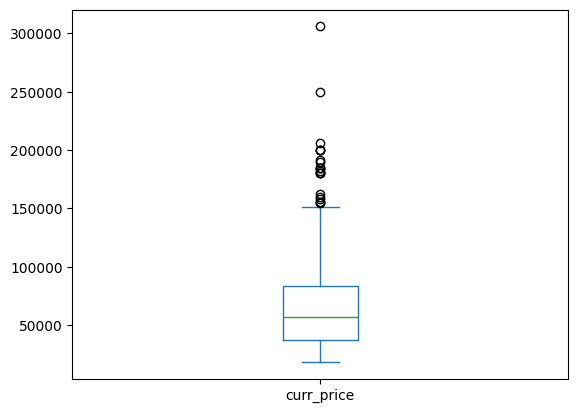

In [119]:
df["curr_price"].plot.box()

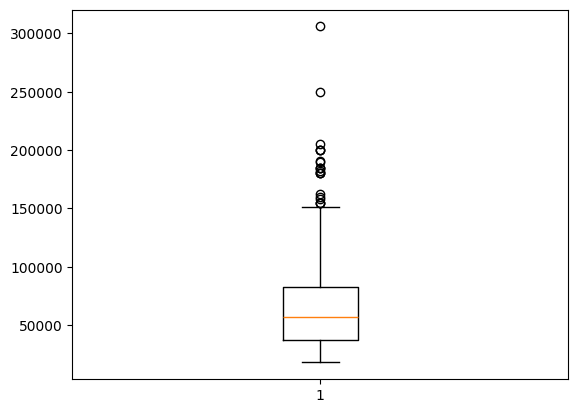

In [120]:
plt.boxplot(df["curr_price"])
plt.show()

We compare price distributions between different product types and different brands. These plots help identify which brands or categories tend to have higher or lower prices.

<Axes: xlabel='curr_price', ylabel='type'>

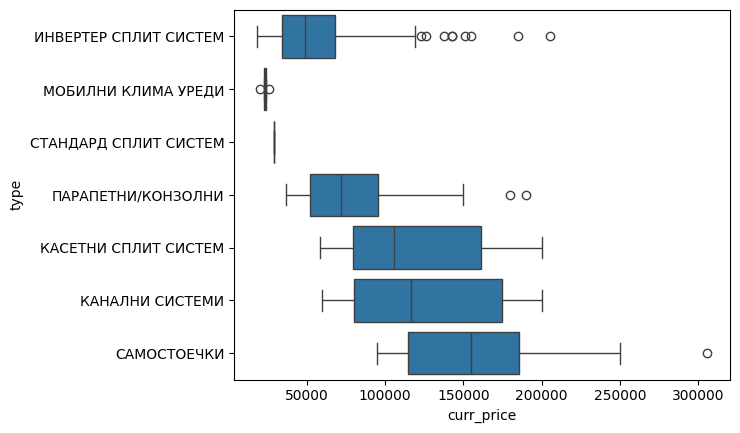

In [121]:
sns.boxplot(df, x="curr_price", y="type")

<Axes: xlabel='curr_price', ylabel='brand'>

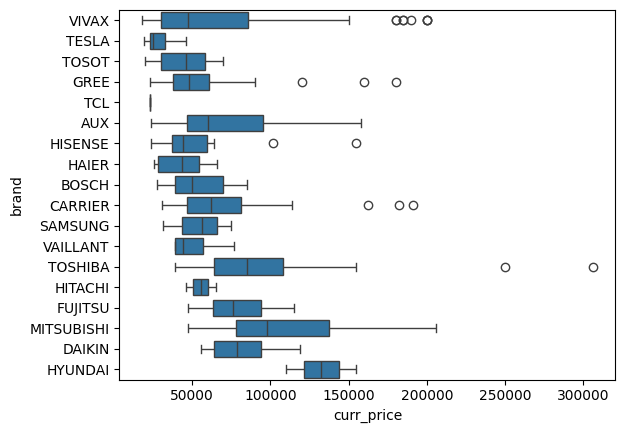

In [122]:
sns.boxplot(df, x="curr_price", y="brand")

## Scatter Plot

We use scatter plots to explore possible relationships:
- between current and previous prices,
- between current price and maximum power,
- between current price and maximum temperature.

This helps to see if higher performance correlates with higher cost.

<Axes: xlabel='curr_price', ylabel='prev_price'>

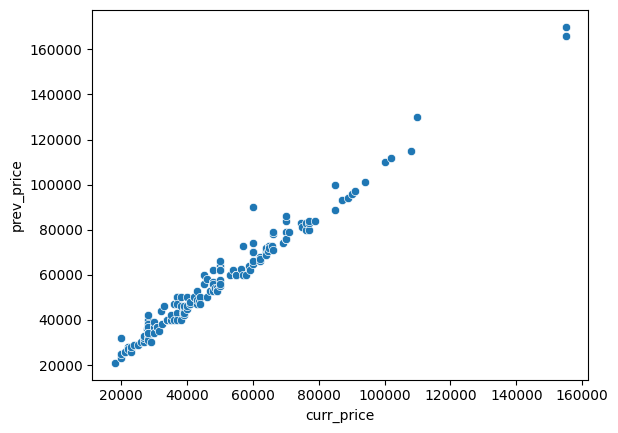

In [123]:
sns.scatterplot(df, x="curr_price", y="prev_price")

<Axes: xlabel='curr_price', ylabel='max_power'>

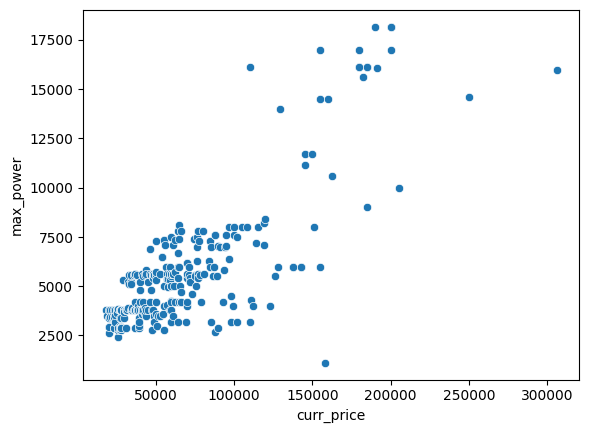

In [124]:
sns.scatterplot(df, x="curr_price", y="max_power")

<Axes: xlabel='curr_price', ylabel='max_temp'>

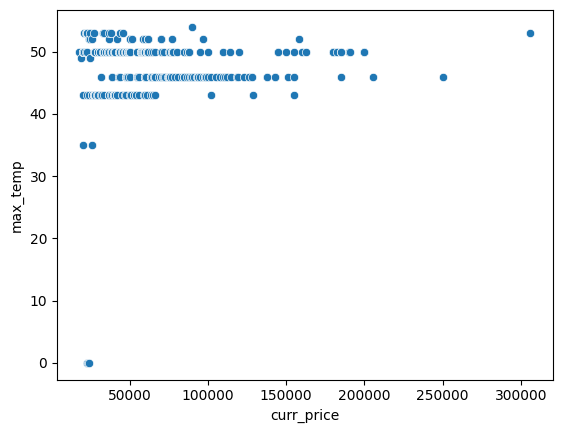

In [125]:
sns.scatterplot(df, x="curr_price", y="max_temp")

## Heatmap

We generate a heatmap showing correlations between all numerical columns. The default correlation type is `pearson`.

<Axes: >

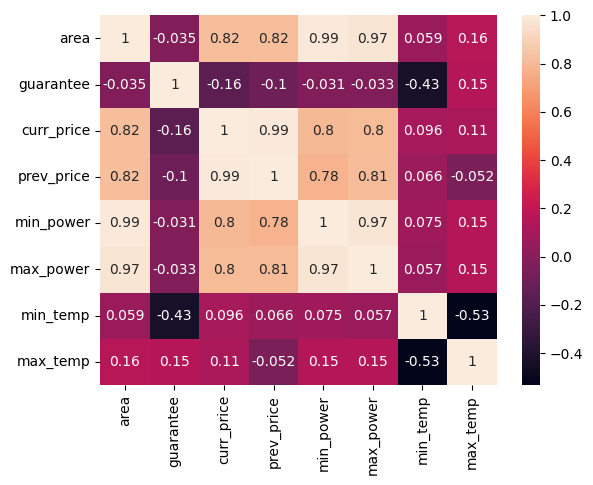

In [126]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

We plot how minimum and maximum power relate to the area each product can cover. These plots show whether there is a correlation between the product power and its area coverage.

<Axes: xlabel='min_power', ylabel='area'>

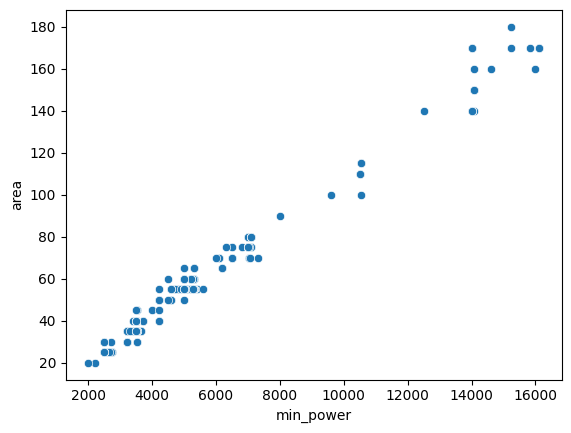

In [127]:
sns.scatterplot(df, x="min_power", y="area")

<Axes: xlabel='max_power', ylabel='area'>

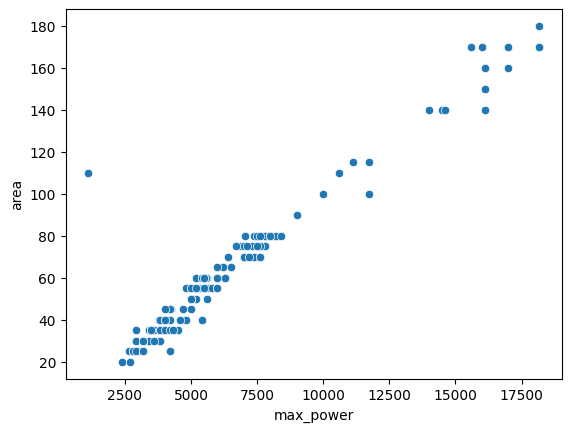

In [128]:
sns.scatterplot(df, x="max_power", y="area")

## Grouping Data

We can use the `.groupby()` method to group the data frame by certain columns, select the columns we want to analyze and aggregate their values across the group using a reduction function, such as `mean`, `min`, `max`, `sum`, etc.

In [129]:
df.groupby(by=["type"])[["curr_price", "prev_price"]].mean()

,curr_price,prev_price
type,,
ИНВЕРТЕР СПЛИТ СИСТЕМ,56080.135135,54879.480519
КАНАЛНИ СИСТЕМИ,125990.000000,NaN
КАСЕТНИ СПЛИТ СИСТЕМ,120769.285714,NaN
МОБИЛНИ КЛИМА УРЕДИ,23310.000000,NaN
ПАРАПЕТНИ/КОНЗОЛНИ,84952.173913,55490.000000
САМОСТОЕЧКИ,162187.333333,144490.000000
СТАНДАРД СПЛИТ СИСТЕМ,28990.000000,29990.000000
